In [ ]:
import matplotlib.pyplot as plt
import torch
import requests

#404 not found 발생 
# r = requests.get("https://archive.ics.uci.edu/m1/machine-learning-databases/iris/iris.data")
#https://archive.ics.uci.edu/ml/machine-learning-databases/iris/
# #request에서 받아오는 data는 binary 형태로 받아와서 'wb'
# f = open('iris.data','wb')
# f.write(r.content)
# f.close()

vectors = []
answers = []

#다운 받은 데이터로 하기
f = open('iris.data', 'r')
data = f.readlines()

for line in data:
  line = line.strip()
  if(len(line)!= 0):
    items = line.split(",")
    vectors.append([float(x) for x in items[:4]])
    answers.append(items[4])

species = {a: i for i, a in enumerate(set(answers))}
#species순서 매기는게 조금 다름
species
# print(vectors)
# print(answers)


{'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}

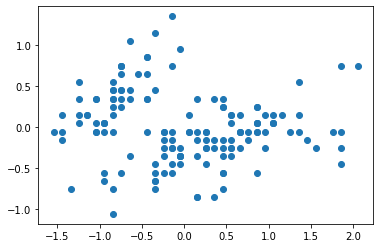

In [ ]:
#좌표 축 이동하기
import numpy as np
X = torch.tensor(vectors)
X = X - X.mean(axis=0)

plt.scatter(X[:,0],X[:,1])

In [ ]:
X = torch.FloatTensor(vectors)
Z = (X-torch.mean(X,axis = 0))

#분산 최대로 하는 w벡터 찾기
def findPC(Z):
  w = torch.randn(Z.shape[1])
  w = w/(torch.dot(w,w)**0.5)

  lr = 0.1

  for epoch in range(1001):
    w.requires_grad_(True)
    variance = torch.mean(torch.sum(Z * w, dim=1) ** 2)

    variance.backward()
    with torch.no_grad():
      w  = w +lr *w.grad
      w = w/(torch.dot(w,w) ** 0.5)
  return w, variance.item()

#PCA
def PCA(Z,n):
  W, V = [], []
  for _ in range(n):
    w, v = findPC(Z)

    W.append(w)
    V.append(v)
    Z = Z - (Z @ w.view(-1,1)) * w
  return W,V

#기존 데이터 변경
def transform(Z,W):
  return Z @ torch.stack(W).T

W, V = PCA(Z,4)
K = transform(Z,W)

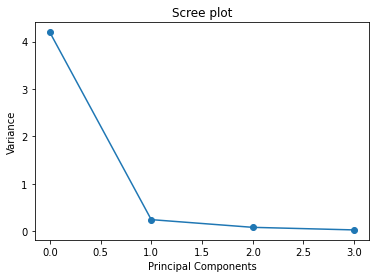

In [ ]:
plt.title("Scree plot")
plt.xlabel("Principal Components")
plt.ylabel("Variance")
plt.plot(range(4), V, "o-")
plt.show()

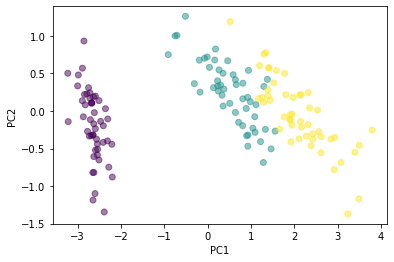

In [ ]:
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.scatter(K[:,0], K[:,1], c=[species[a] for a in answers] , alpha=0.5)
plt.show()